# Myqos tutorial

Myqos is a cloud-based service for runnnig circuits on backends. The main selling-point is that results are saved and can be shared with other users. 

You can store your logins to IBMQ and Quantinuum in Myqos so that you only ever need to use your Myqos login.

Myqos has both a website and a python package. Many features (e.g. adding teams, managing experiments) can be done in both places. Here we will just focus on the package.

For much more information, see the [myqos documentation](https://myqos.com/). Also see the specific backend tutorials for more information on how to use Myqos with a specific backend.

n.b. Myqos is currently in development, so access instructions, along with many things in this tutorial, may well change. Everything here was correct at time of writing (June 2023). See the docs for the most up-to-date information, including installation instructions.

## Import packages

In [1]:
from pytket.extensions.myqos import Myqos, MyqosBackend, AerConfig
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter as rcj
from utils.utils import plot_bars

Myqos works in a similar way to pytket. Instead of having a `Backend` for every type of device, we have a `MyqosBackend` which takes:
- A `Config`, specifying the device and any other options
- A `MyqosExperiment` which holds the results for a group of circuits, and which can be shared with other users
- *(optional)* 

In [2]:
# Instantiate and log in to Myqos
myqos = Myqos()
myqos.login()

Here we'll run a simple example using the `Aer` simulator. See the other notebooks for more detail on using Myqos with other backends.

In [4]:
# Define the Myqos config
config = AerConfig()

experiment = myqos.new_experiment('myqos_tutorial_experiment')

# Or, if you already created it:
# experiment = myqos.get_experiment_by_name('myqos_tutorial')


New experiment created: myqos_tutorial_experiment


In [5]:
# Define backend
backend = MyqosBackend(config, experiment)


Started using experiment with name: myqos_tutorial_experiment


The rest of the process is just like using a tket backend as in the previous tutorial. We first compile the circuit, then run it.

In [6]:
# Define a circuit
c = Circuit(2)
c.H(0).CX(0, 1).measure_all()
rcj(c)

In [7]:
# Compile circuit to backend
compiled_c = backend.get_compiled_circuit(c)

In [15]:
# Submit circuit to backend
handle = backend.process_circuit(compiled_c, n_shots=1000)

(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'center': 'Example Myqos experiment'}>)

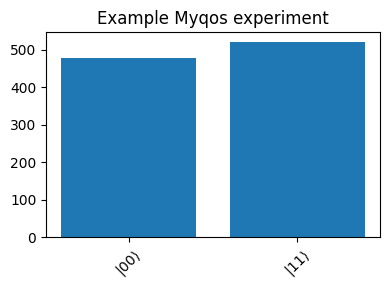

In [9]:
# Get results and plot
result = backend.get_result(handle)

counts = result.get_counts()

plot_bars(counts, "Example Myqos experiment")

I can now access these results from the Myqos website:

![myqos results](../imgs/myqos_experiment.png)

These results can be accessed with python at a later date by either called `experiment.get_all_results()`:

In [12]:
all_results = experiment.get_all_results()
all_counts = [r.get_counts() for r in all_results]

print(all_counts[0])

Counter({(1, 1): 521, (0, 0): 479})


Alternatively, you can save the handles (for example using `pickle`), and then load them from there using `backend.get_results(handles)`:


In [16]:
### Uncomment this code to run it and save the handles

# import pickle
# with open('handle.pkl', 'wb') as f:
#     pickle.dump(handle, f)

# with open('handle.pkl', 'rb') as f:
#     handle = pickle.load(f)

result_from_handle = backend.get_result(handle)
counts = result.get_counts()
print(counts)

Counter({(1, 1): 521, (0, 0): 479})


## Adding a team to an experiment

You can add a team on the Myqos interface and use this to share results with other people.

Create a team and add users on the [Myqos website](https://myqos.com/).

Once you've done this you can access the team using the python package.

In [17]:
team = myqos.get_team_by_name('tutorials_team')
print(team)

You can give a team access to an experiment by passing `team.id` and the access type:

In [20]:
experiment.update_experiment_acl_for_team(team.id, {'Read', 'Write', 'Delete'})

On the website you can see that the team has access to the experiment:

![myqos team](../imgs/myqos_team.png)